In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read The Data

In [2]:
features =  ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "MartialStatus", "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", "Hoursperweek", "Country", "Target"]

In [3]:
data_train = pd.read_csv('adult.data', names = features)
data_train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_test = pd.read_csv('adult.test', names = features)
data_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,MartialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Hoursperweek,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


# Data Pre-Processing

In [5]:
data_train.shape

(32561, 15)

In [6]:
data_test.shape

(16282, 15)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   Workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   Education-Num  32561 non-null  int64 
 5   MartialStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Sex            32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  Hoursperweek   32561 non-null  int64 
 13  Country        32561 non-null  object
 14  Target         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            16282 non-null  object 
 1   Workclass      16281 non-null  object 
 2   fnlwgt         16281 non-null  float64
 3   Education      16281 non-null  object 
 4   Education-Num  16281 non-null  float64
 5   MartialStatus  16281 non-null  object 
 6   Occupation     16281 non-null  object 
 7   Relationship   16281 non-null  object 
 8   Race           16281 non-null  object 
 9   Sex            16281 non-null  object 
 10  CapitalGain    16281 non-null  float64
 11  CapitalLoss    16281 non-null  float64
 12  Hoursperweek   16281 non-null  float64
 13  Country        16281 non-null  object 
 14  Target         16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [9]:
data_train.isnull().sum()

Age              0
Workclass        0
fnlwgt           0
Education        0
Education-Num    0
MartialStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
Hoursperweek     0
Country          0
Target           0
dtype: int64

In [10]:
data_test.isnull().sum()

Age              0
Workclass        1
fnlwgt           1
Education        1
Education-Num    1
MartialStatus    1
Occupation       1
Relationship     1
Race             1
Sex              1
CapitalGain      1
CapitalLoss      1
Hoursperweek     1
Country          1
Target           1
dtype: int64

# Filling the NAN Values

In [11]:
data_test['Workclass'].fillna('Workclass', inplace = True)

In [12]:
data_test['fnlwgt'].fillna('fnlwgt', inplace = True)

In [13]:
data_test['Education'].fillna('Education', inplace = True)

In [14]:
data_test['Education-Num'].fillna('Education-Num', inplace = True)

In [15]:
data_test['MartialStatus'].fillna('MartialStatus', inplace = True)

In [16]:
data_test['Occupation'].fillna('Occupation', inplace = True)

In [17]:
data_test['Relationship'].fillna('Relationship', inplace = True)

In [18]:
data_test['Race'].fillna('Race', inplace = True)

In [19]:
data_test['Sex'].fillna('Sex', inplace = True)

In [20]:
data_test['CapitalGain'].fillna('CapitalGain', inplace = True)

In [21]:
data_test['CapitalLoss'].fillna('CapitalLoss', inplace = True)

In [22]:
data_test['Hoursperweek'].fillna('Hoursperweek', inplace = True)

In [23]:
data_test['Country'].fillna('Country', inplace = True)

In [24]:
data_test['Target'].fillna('Target', inplace = True)

# Label Encoder 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

# For Train Data

In [27]:
label = data_train.select_dtypes(include = 'object').columns

for i in label:
    
    data_train[i] = le.fit_transform(data_train[i].astype(str))

In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            32561 non-null  int64
 1   Workclass      32561 non-null  int32
 2   fnlwgt         32561 non-null  int64
 3   Education      32561 non-null  int32
 4   Education-Num  32561 non-null  int64
 5   MartialStatus  32561 non-null  int32
 6   Occupation     32561 non-null  int32
 7   Relationship   32561 non-null  int32
 8   Race           32561 non-null  int32
 9   Sex            32561 non-null  int32
 10  CapitalGain    32561 non-null  int64
 11  CapitalLoss    32561 non-null  int64
 12  Hoursperweek   32561 non-null  int64
 13  Country        32561 non-null  int32
 14  Target         32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [29]:
data_train.isnull().sum()

Age              0
Workclass        0
fnlwgt           0
Education        0
Education-Num    0
MartialStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
Hoursperweek     0
Country          0
Target           0
dtype: int64

# For Test Data

In [30]:
label1 = data_test.select_dtypes(include = 'object').columns

for i in label1:
    
    data_test[i] = le.fit_transform(data_test[i].astype(str))

In [31]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            16282 non-null  int32
 1   Workclass      16282 non-null  int32
 2   fnlwgt         16282 non-null  int32
 3   Education      16282 non-null  int32
 4   Education-Num  16282 non-null  int32
 5   MartialStatus  16282 non-null  int32
 6   Occupation     16282 non-null  int32
 7   Relationship   16282 non-null  int32
 8   Race           16282 non-null  int32
 9   Sex            16282 non-null  int32
 10  CapitalGain    16282 non-null  int32
 11  CapitalLoss    16282 non-null  int32
 12  Hoursperweek   16282 non-null  int32
 13  Country        16282 non-null  int32
 14  Target         16282 non-null  int32
dtypes: int32(15)
memory usage: 954.1 KB


In [32]:
data_test.isnull().sum()

Age              0
Workclass        0
fnlwgt           0
Education        0
Education-Num    0
MartialStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
Hoursperweek     0
Country          0
Target           0
dtype: int64

# Seperation of X and Y Lables of Train Data

In [34]:
X_train = data_train.iloc[:,0:14]
Y_train = data_train.iloc[:,-1]

# Seperation of X and Y Lables of Test Data

In [35]:
X_test = data_test.iloc[:,0:14]
Y_test = data_test.iloc[:,-1]

# Naive Bayes Model

In [36]:
from sklearn import naive_bayes

In [37]:
Naive_Bayes = naive_bayes.MultinomialNB()

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
Naive_Bayes.fit(X_train, Y_train)
Y_pred = Naive_Bayes.predict(X_test)
Accuracy_of_Naive_Bayes = Naive_Bayes.score(X_test, Y_test)*100
print ("Accuracy of Naive Bayes Model:", Accuracy_of_Naive_Bayes)

Accuracy of Naive Bayes Model: 76.51394177619457


In [40]:
from sklearn.metrics import recall_score

In [41]:
Recall_Score_of_Naive_Bayes = recall_score(Y_test, Y_pred, average='macro') * 100
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_Naive_Bayes)

Recall Score of Naive Bayes Model: 38.50139289045627


In [42]:
from sklearn.metrics import precision_score

In [43]:
Precision_Score_of_Naive_Bayes = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_Naive_Bayes)

Precision Score of Naive Bayes Model: 43.38346601563767


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.metrics import f1_score

In [45]:
F1_Score_of_Naive_Bayes = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of Naive Bayes Model:", F1_Score_of_Naive_Bayes)

F1 Score of Naive Bayes Model: 38.9026449868262


# KNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
Accuracy_of_KNN = (accuracy_score(Y_pred, Y_test)) * 100
print ("Accuracy of KNN Model:", Accuracy_of_KNN)

Accuracy of KNN Model: 76.37268148876059


In [50]:
from sklearn.metrics import recall_score

In [51]:
Recall_Score_of_KNN = recall_score(Y_test, Y_pred, average='macro')*100
print ("Recall Score of KNN Model:", Recall_Score_of_KNN)

Recall Score of KNN Model: 33.33333333333333


In [52]:
from sklearn.metrics import precision_score

In [53]:
Precision_Score_of_KNN = precision_score(Y_test, Y_pred, average = 'macro') * 100
print ("Precision Score of KNN Model:", Precision_Score_of_KNN)

Precision Score of KNN Model: 25.457560496253535


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.metrics import f1_score

In [55]:
F1_Score_of_KNN = f1_score(Y_test, Y_pred, average='macro') * 100
print ("F1 Score of KNN Model:", F1_Score_of_KNN)

F1 Score of KNN Model: 28.867917958003968


# Comparsion of Both KNN And Naive Bayes Model

In [56]:
print("Accuray of KNN: ", Accuracy_of_KNN)
print("Accuray of Naive Bayes: ", Accuracy_of_Naive_Bayes)

Accuray of KNN:  76.37268148876059
Accuray of Naive Bayes:  76.51394177619457


In [57]:
x = ['KNN','Naive Bayes']
y = [Accuracy_of_KNN, Accuracy_of_Naive_Bayes]
y

[76.37268148876059, 76.51394177619457]

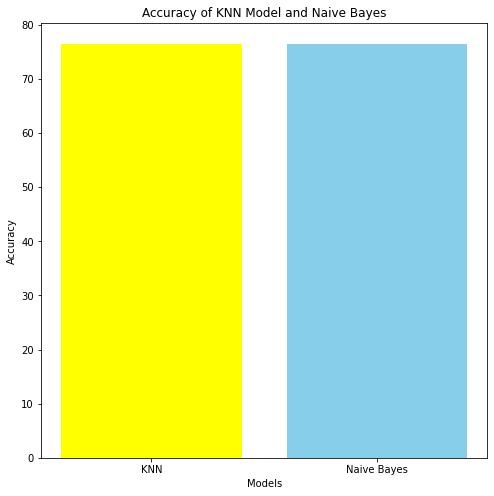

In [58]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['yellow', 'skyblue'])
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title("Accuracy of KNN Model and Naive Bayes")
plt.show()

In [59]:
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_Naive_Bayes)
print ("Recall Score of Naive Bayes Model:", Recall_Score_of_KNN)

Recall Score of Naive Bayes Model: 38.50139289045627
Recall Score of Naive Bayes Model: 33.33333333333333


In [60]:
x = ['KNN','Naive Bayes']
y = [Recall_Score_of_KNN, Recall_Score_of_Naive_Bayes]
y

[33.33333333333333, 38.50139289045627]

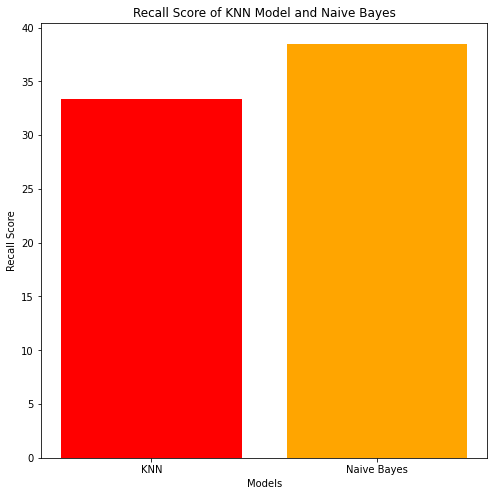

In [61]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['red', 'orange'])
plt.xlabel('Models')
plt.ylabel("Recall Score")
plt.title("Recall Score of KNN Model and Naive Bayes")
plt.show()

In [62]:
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_Naive_Bayes)
print ("Precision Score of Naive Bayes Model:", Precision_Score_of_KNN)

Precision Score of Naive Bayes Model: 43.38346601563767
Precision Score of Naive Bayes Model: 25.457560496253535


In [63]:
x = ['KNN','Naive Bayes']
y = [Precision_Score_of_KNN, Precision_Score_of_Naive_Bayes]
y

[25.457560496253535, 43.38346601563767]

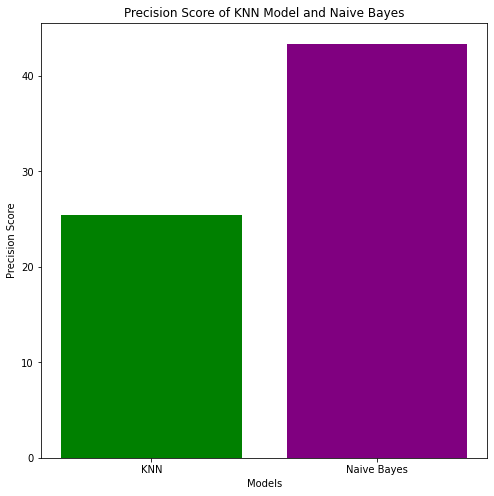

In [64]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['green', 'purple'])
plt.xlabel('Models')
plt.ylabel("Precision Score")
plt.title("Precision Score of KNN Model and Naive Bayes")
plt.show()

In [65]:
print ("F1 Score of Naive Bayes Model:", F1_Score_of_Naive_Bayes)
print ("F1 Score of Naive Bayes Model:", F1_Score_of_KNN)

F1 Score of Naive Bayes Model: 38.9026449868262
F1 Score of Naive Bayes Model: 28.867917958003968


In [66]:
x = ['KNN','Naive Bayes']
y = [F1_Score_of_KNN, F1_Score_of_Naive_Bayes]
y

[28.867917958003968, 38.9026449868262]

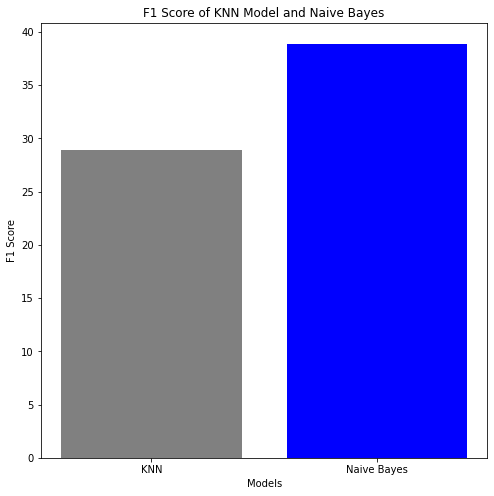

In [67]:
plt.figure(figsize = (8,8))
plt.bar(x,y, color = ['grey', 'blue'])
plt.xlabel('Models')
plt.ylabel("F1 Score")
plt.title("F1 Score of KNN Model and Naive Bayes")
plt.show()